# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# data Loading

In [13]:
data_path = "https://raw.githubusercontent.com/DriveMyScream/Multiple_Stock_Price_Prediction/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20India.csv"
dataset = pd.read_csv(data_path, parse_dates=['Date'])
dataset.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-05-15,"27,196.6","26,920.4","27,284.3","26,752.1",32.80K,1.03%
1,2023-05-14,"26,920.0","26,777.4","27,176.1","26,609.9",26.35K,0.53%
2,2023-05-13,"26,777.5","26,798.7","27,011.9","26,695.6",27.95K,-0.08%
3,2023-05-12,"26,799.2","26,983.1","27,044.0","25,853.1",87.49K,-0.68%
4,2023-05-11,"26,983.5","27,604.3","27,607.4","26,766.2",62.85K,-2.25%


In [15]:
dataset = dataset[::-1]
dataset.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
1960,2018-01-01,"13,444.9","13,850.5","13,921.5","12,877.7",78.43K,-2.93%
1959,2018-01-02,"14,754.1","13,444.9","15,306.1","12,934.2",137.73K,9.74%
1958,2018-01-03,"15,156.6","14,754.1","15,435.0","14,579.7",106.54K,2.73%
1957,2018-01-04,"15,180.1","15,156.5","15,408.7","14,244.7",110.97K,0.15%
1956,2018-01-05,"16,954.8","15,180.1","17,126.9","14,832.4",141.96K,11.69%


In [16]:
def parse_float(string_value):
  cleaned_string = string_value.replace(",", "")
  float_value = float(cleaned_string)
  return float_value

In [17]:
dataset['Open'] = dataset['Open'].astype(str).apply(parse_float)
dataset['High'] = dataset['High'].astype(str).apply(parse_float)
dataset['Low'] = dataset['Low'].astype(str).apply(parse_float)
dataset['Price'] = dataset['Price'].astype(str).apply(parse_float)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 1960 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1961 non-null   datetime64[ns]
 1   Price     1961 non-null   float64       
 2   Open      1961 non-null   float64       
 3   High      1961 non-null   float64       
 4   Low       1961 non-null   float64       
 5   Vol.      1961 non-null   object        
 6   Change %  1961 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 107.4+ KB


In [19]:
dataset.describe()

,Price,Open,High,Low
count,1961.000000,1961.000000,1961.000000,1961.000000
mean,20626.350127,20619.737991,21149.574503,20027.474350
std,16453.351157,16453.517257,16895.648915,15947.276149
min,3228.700000,3228.600000,3282.300000,3177.000000
25%,7970.100000,7971.400000,8185.100000,7754.100000
50%,11753.400000,11752.900000,11964.000000,11406.400000
75%,31367.600000,31370.300000,32377.500000,29911.900000
max,67527.900000,67528.700000,68990.600000,66334.900000


In [20]:
dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

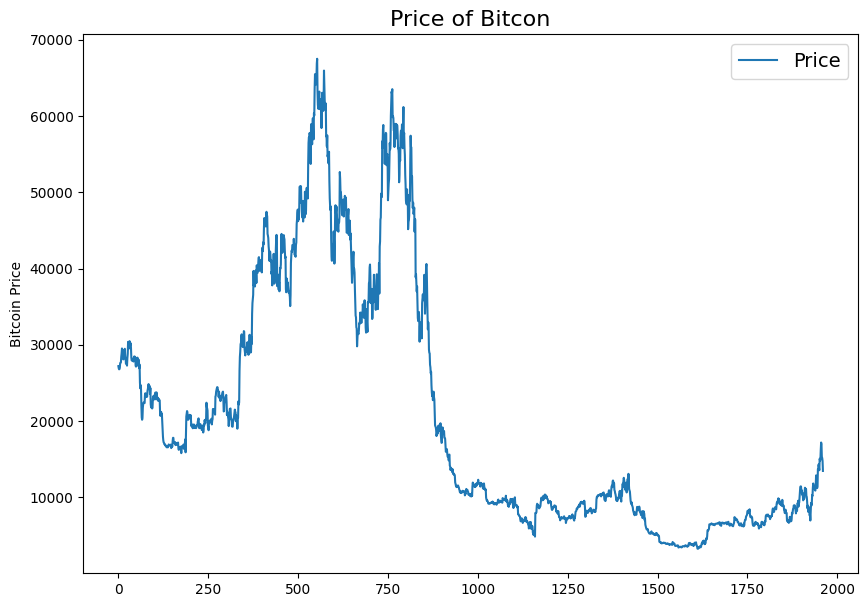

In [21]:
import matplotlib.pyplot as plt
dataset['Price'].plot(figsize=(10, 7))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcon", fontsize=16)
plt.legend(fontsize=14);

In [22]:
price_data = dataset['Price'].values
price_data

array([13444.9, 14754.1, 15156.6, ..., 26777.5, 26920. , 27196.6])

In [23]:
price_data.shape

(1961,)

In [24]:
train_data, test_data = price_data[0:1800], price_data[1800:]

In [25]:
train_data.shape, test_data.shape

((1800,), (161,))

In [26]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [27]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1792, 7), (1792,), (153, 7), (153,))

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1792, 7, 1)
(153, 7, 1)


In [30]:
X_train[0]

array([[13444.9],
       [14754.1],
       [15156.6],
       [15180.1],
       [16954.8],
       [17172.3],
       [16228.2]])

In [31]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [32]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7, 1)             3         
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 7, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                        

In [34]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [35]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
51/51 [==============================] - 6s 29ms/step - loss: 741052928.0000 - mae: 20385.9551 - val_loss: 423805376.0000 - val_mae: 20434.5723
Epoch 2/30
51/51 [==============================] - 1s 17ms/step - loss: 740832704.0000 - mae: 20379.7715 - val_loss: 422949216.0000 - val_mae: 20412.7109
Epoch 3/30
51/51 [==============================] - 1s 18ms/step - loss: 726100928.0000 - mae: 19864.6191 - val_loss: 359606560.0000 - val_mae: 18737.5547
Epoch 4/30
51/51 [==============================] - 1s 18ms/step - loss: 666822464.0000 - mae: 17528.0430 - val_loss: 284886912.0000 - val_mae: 16599.9434
Epoch 5/30
51/51 [==============================] - 1s 18ms/step - loss: 560470592.0000 - mae: 16313.2627 - val_loss: 191234144.0000 - val_mae: 13545.1836
Epoch 6/30
51/51 [==============================] - 1s 18ms/step - loss: 288519200.0000 - mae: 12135.4727 - val_loss: 38800912.0000 - val_mae: 5889.1382
Epoch 7/30
51/51 [==============================] - 1s 17ms/step - loss:

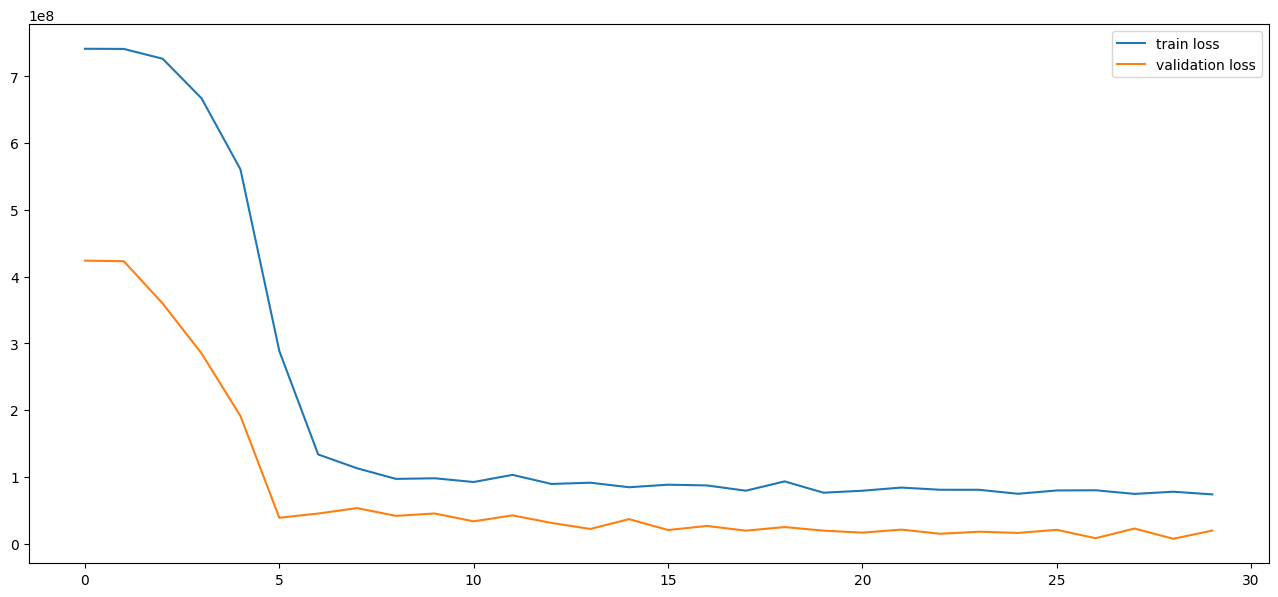

In [36]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 1s 15ms/step


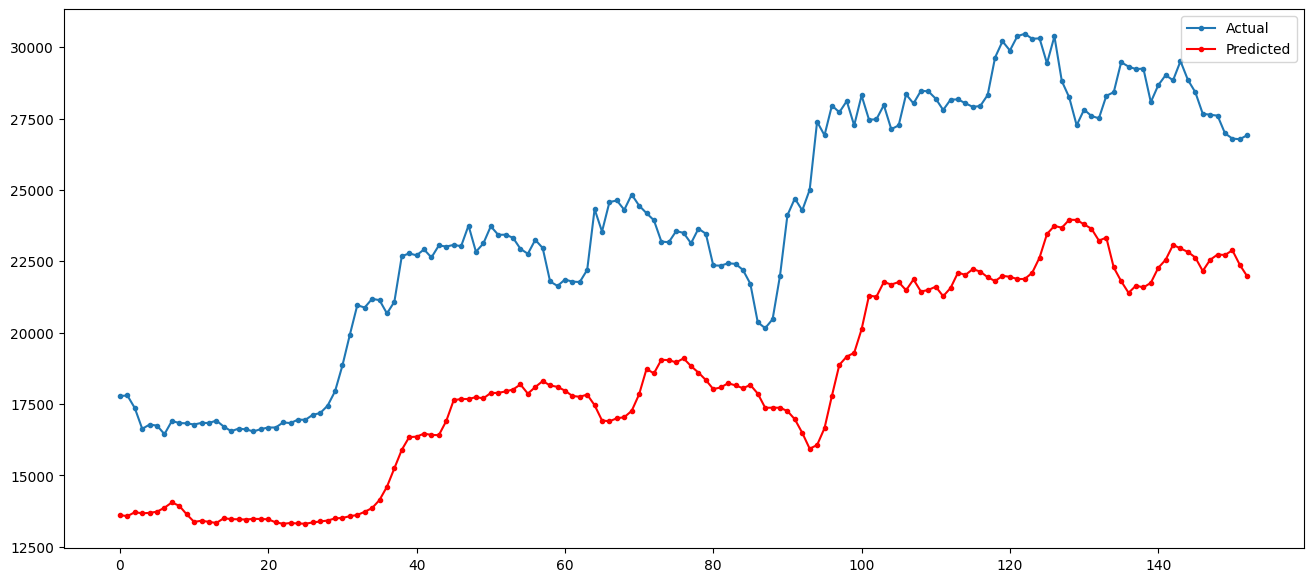

In [38]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 4374.4198096989285
Train MAE: 55.439903176470246
Test RMSE: 5766.702246097194
Test MAE: 74.0637494982297


# at Inference

In [40]:
model.save("Bitcoin_Price_Prediction")

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
model = tf.keras.saving.load_model("/content/Bitcoin_Price_Prediction")

In [43]:
%cp -av /content/Bitcoin_Price_Prediction /content/drive/MyDrive/Multiple_Stock_Price_Prediction

'/content/Bitcoin_Price_Prediction' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction'
'/content/Bitcoin_Price_Prediction/variables' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction/variables'
'/content/Bitcoin_Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Bitcoin_Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction/variables/variables.index'
'/content/Bitcoin_Price_Prediction/assets' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction/assets'
'/content/Bitcoin_Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Bitcoin_Price_Prediction/fingerprint.pb'
'/content/Bitcoin_Price_Prediction/saved_model.pb' -> '/content/drive/MyDrive/

In [44]:
X_test[0].shape

(7, 1)

In [45]:
prices = np.array([[13444.9],
       [14754.1],
       [15156.6],
       [15180.1],
       [16954.8],
       [17172.3],
       [16228.2]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 2s 2s/step
Prediction Price:  11686.826


In [46]:
print("Predicted Bitcoin Price: {0:.2f} ".format(prediction_price))

Predicted Bitcoin Price: 11686.83 
